<a href="https://colab.research.google.com/github/antonson-j1/nothing-just-my-personal/blob/master/EE4371_Assignment_4_ee19b025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question-1**

Show how to implement a stack using two queues. Analyze the running time of the
stack operations.

## **Solution:**



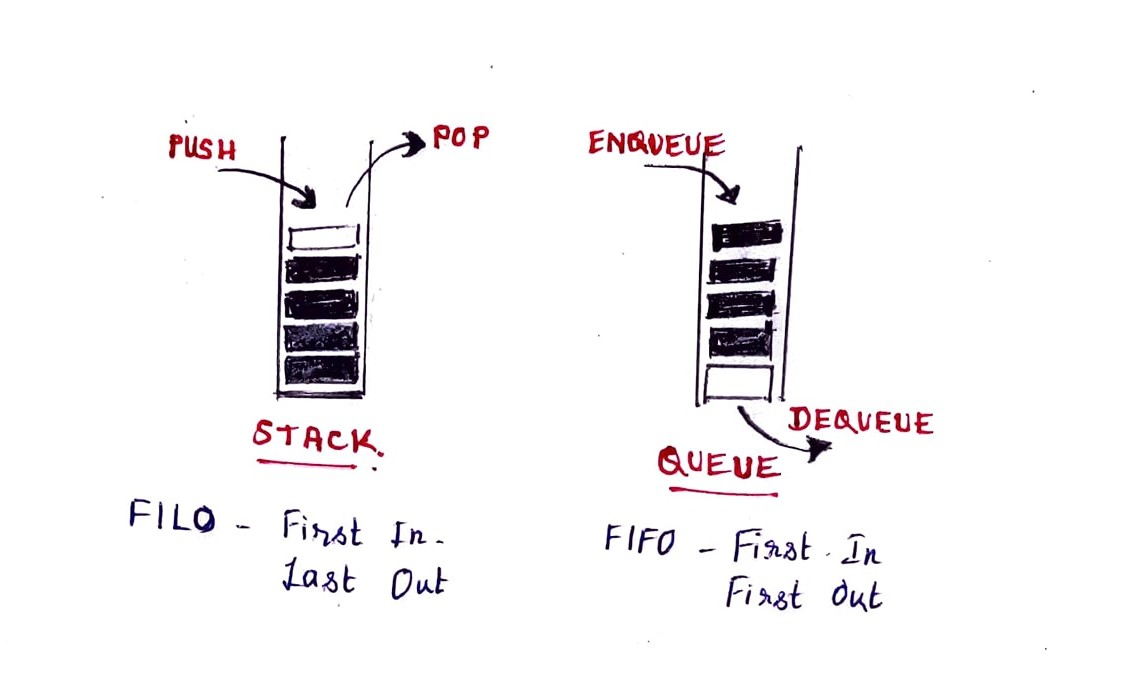

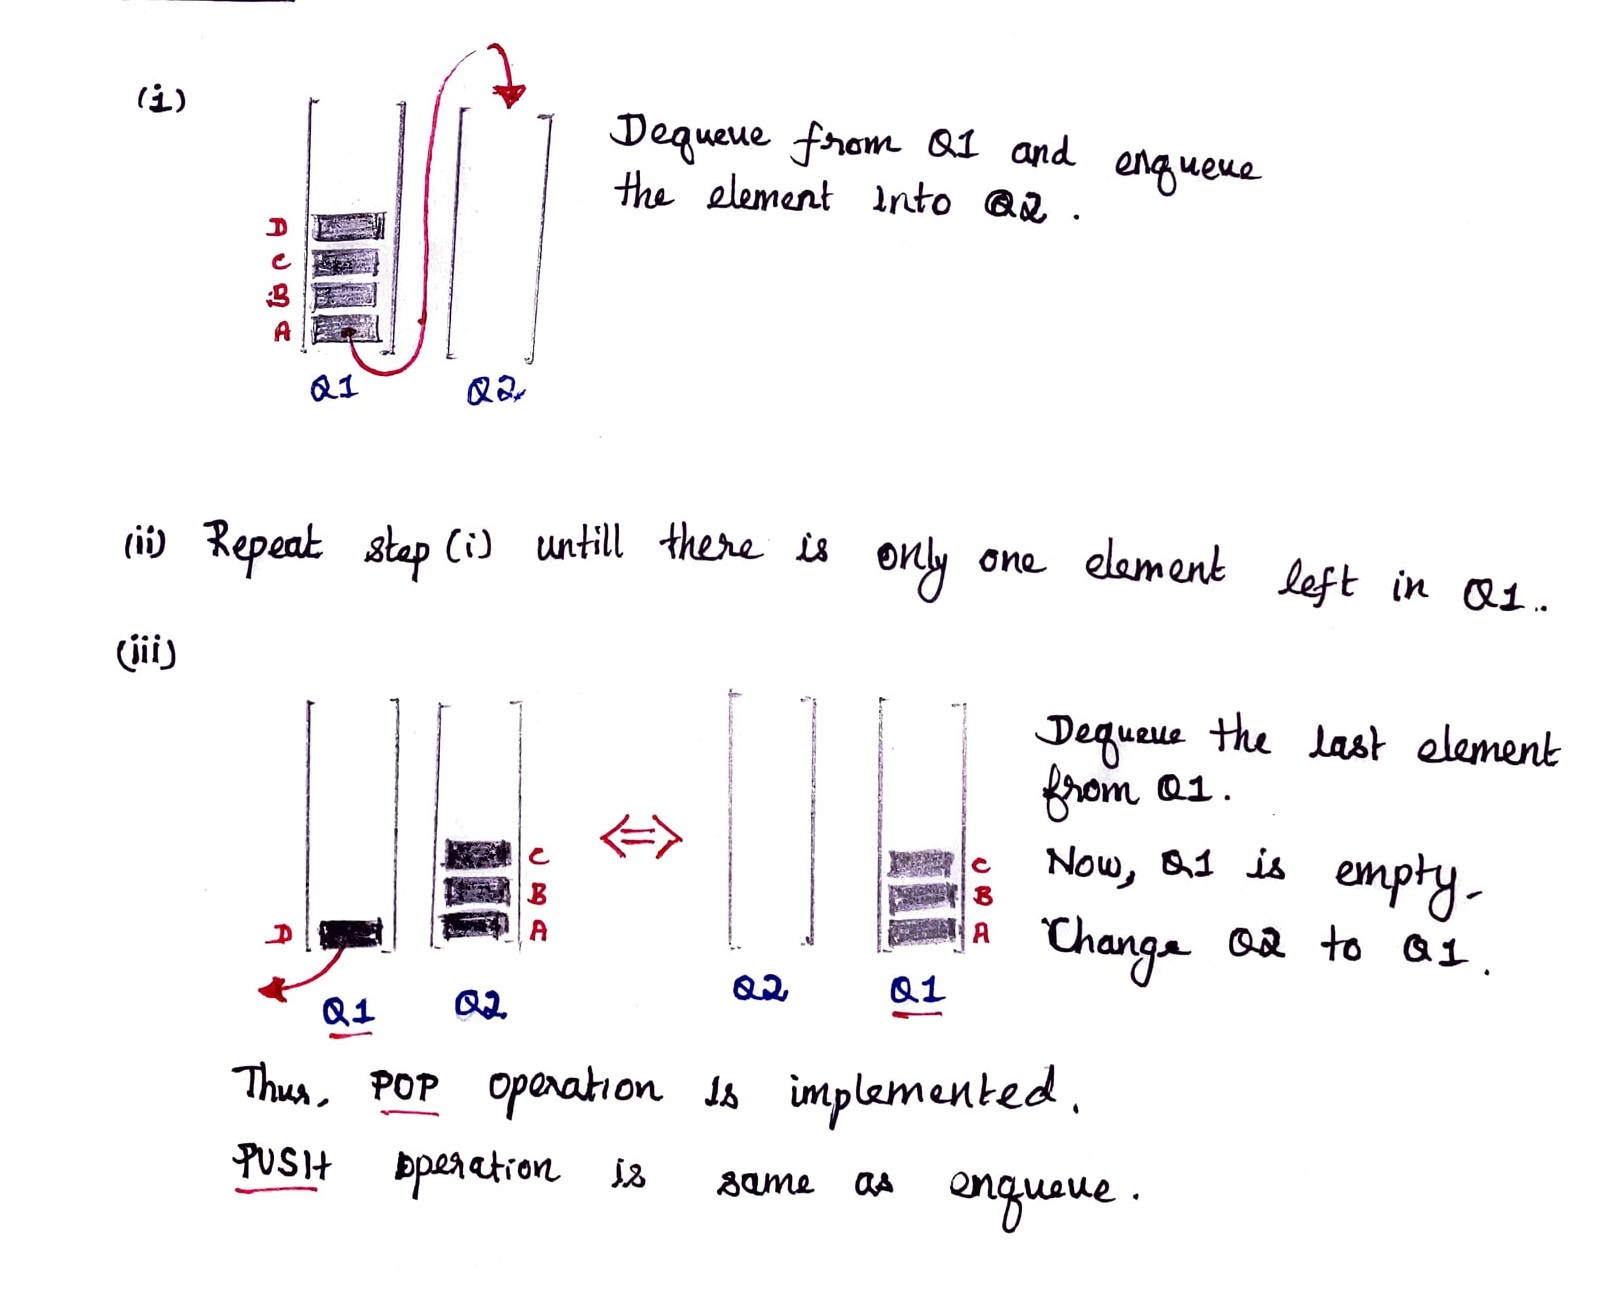

In [10]:
from queue import Queue 

class stack: 
    def __init__(self): 
        self.q = []
        self.q.append(Queue())
        self.q.append(Queue())
        self.curr_size = 0

    def push(self, x): 
        self.curr_size = self.curr_size + 1
        self.q[1].put(x)                    # Push x first in empty q2
        
        while (not self.q[0].empty()):      # Push all the remaining
            self.q[1].put(self.q[0].queue[0])   # elements in q1 to q2.
            self.q[0].get() 


        self.q[0], self.q[1] = self.q[1], self.q[0]

    def pop(self): 

        # if no elements are there in q1
        if (self.q[0].empty()):
            return
        self.q[0].get()
        self.curr_size -= 1

    def top(self): 
        if (self.q[0].empty()): 
            return -1
        return self.q[0].queue[0] 

    def size(self): 
        return self.curr_size 

In [11]:
# Driver Code

s = stack() 
s.push(1)
s.push(2)
s.push(3)

print("current size: ", s.size()) 

print(s.top())
s.pop()
print(s.top())
s.pop()
print(s.top())

print("current size: ", s.size()) 

current size:  3
3
2
1
current size:  1


# **Question 2**
Demonstrate what happens when we insert the keys $5, 28, 19, 15, 20, 33, 12, 17, 10$ into a hash table with collisions resolved by chaining. Let the table have $9$ slots, and let the hash function be $h(k) = k$ $mod$ $9$.


## **Solution:**



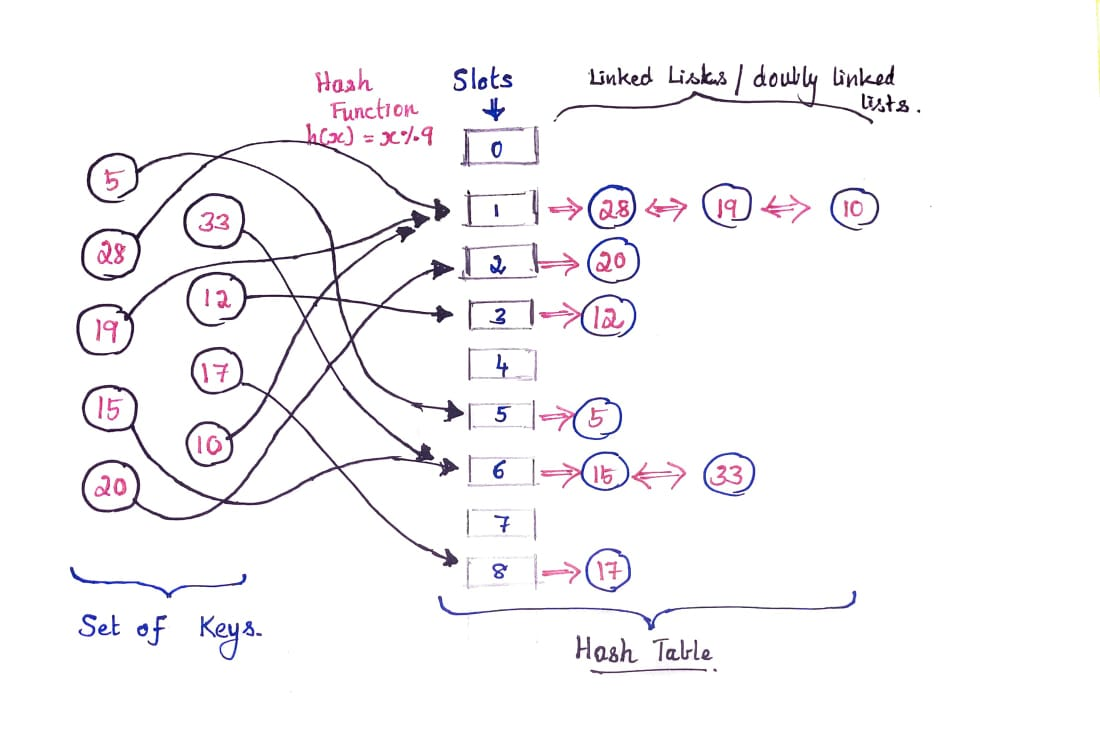

***Hashed values:***

$5$ $mod$ $9=5$

$28$ $mod$ $9=1$

$19$ $mod$ $9=1$

$15$ $mod$ $9=6$

$20$ $mod$ $9=2$

$33$ $mod$ $9=6$

$12$ $mod$ $9=3$

$17$ $mod$ $9=8$

$10$ $mod$ $9=1$


# **Question 3**
Consider a binary search tree $T$ whose keys are distinct. Show that if the right subtree of a node $X$ in $T$ is empty and $X$ has a successor $Y$ , then $Y$ is the lowest ancestor of $X$ whose left child is also an ancestor of $X$ .

## **Solution:**

### **Definitions:**
**Ancestor:**

> An ancestor of $x$ is a node in the tree that comes physically above $x$.
* $x$ is considered to be an ancestor of itself.

**Successor:**

> A successor of $x$ is the smallest node in the tree that is greater than $x$.
* Hence, $x$ is not a successor of itself.


### **Given:**

$x$ has *no right branch* $\Rightarrow$ there is *no number greater than* $x$ which occurs below it.

$\therefore$ ***Succesors of x will occur only above it ($i.e$ Successor will be an ancestor)***.
<br> <br>

This would also imply that the smallest number $y$ that is just greater than $x$ ($i.e$ $y$ is the successor of $x$) is either the immediate right ancestor of $x$ ($i.e$ $x$ is the immediate left child of $y$) or $x$ is the right child of $z$ , where $z$ is any left child of $y$ ($i.e$ $ y>z<x $, or $y>x>z$)





### **Proving our Claims:**

#### ***Claim-1:*** *$x$ has no sucessor below it, hence any of it's successor much occur above it only.*

#### ***Proof by contradiction:***

Let's say $x$ has a successsor $y$ that is in the same level as $x$. But, $y>x$ and they must have a common parent (Let's say $z$), then $y>z>x$. But then, $y$ will not be the successor of $x$ anymore.

Hence Proved our initial Claim is True
<br><br>
#### ***Claim-2:*** *$x$ lies in the left subtree of $y$*

#### ***Proof by contradiction:***

Let's say $y$ is the left parent of $z$ ($i.e$ $z$ & $x$ lies in Right subtree of $y$). Hence, $z>y$, and also $x>y$. But then, $y>x$ is being contradicted.

Hence Proved our initial Claim is True.
<br> <br> <br>


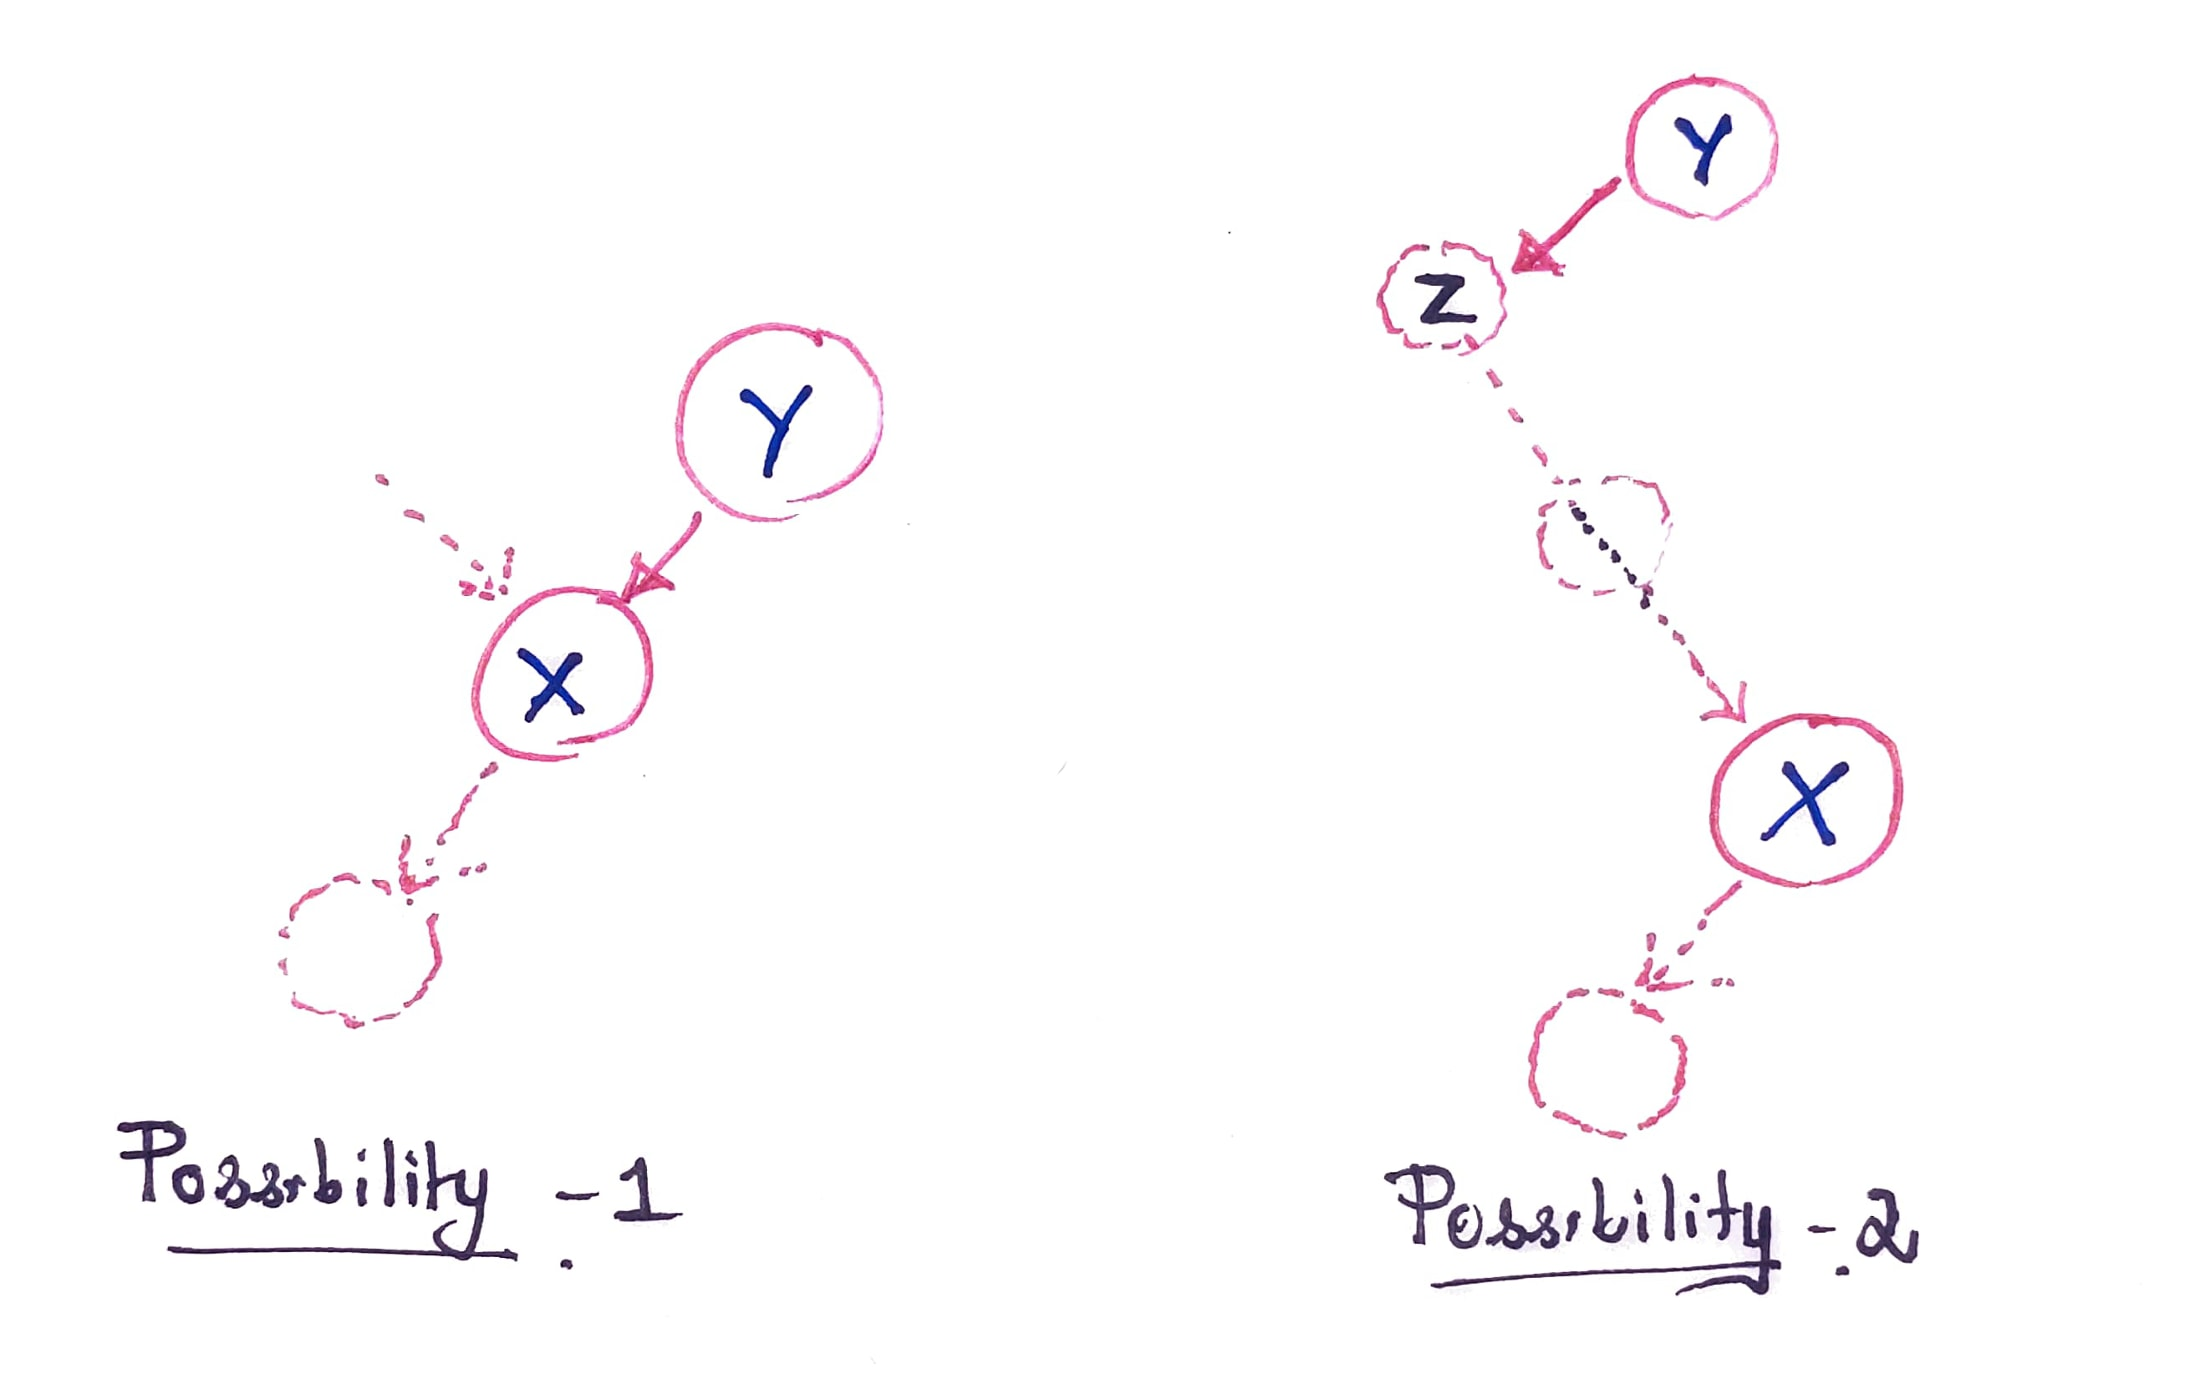

### **Conclusion:**
 > If $y$ is the lowest ancestor whose left child is also an ancestor of $x$ **or** if $y$ is the immediate ancestor of $x$ (consider $x$ to be an ancestor of itself), the above Hypothesis holds true.

<br> <br> <br>


# **Question 4**
Describe a non-recursive algorithm for enumerating all permutations of the numbers ${1, 2, …,n}$ using an explicit stack.


## **Solution:**



The given solution is first implemented through function recursion followed by which an external stack is used to enumerate all the permutations:
<br><br>

**Pseudocode using function recursion:**
```
FUNCTION permutation(X,Y):
    output = []
    numbers = [1,2,3,....,n]
    stack = []
```

In [25]:
class Stack():
    def __init__(self):
        self._data = []
    
    def is_empty(self):
        return len(self._data) == 0
    
    def push(self, value):
        self._data.append(value)
    
    def pop(self):
        if self.is_empty():
            raise Empty('List is empty')
        return self._data.pop()

In [28]:
# Function definition starts
def find_permutations_stack(n):       # this function finds the list of all possible permutations of the list of numbers from [1,2,3,....,n]  
    nums = {x for x in range(1, n+1)} # Create the list of [1,2,3,...,n]
    S = Stack()                       # initialize S to be an object if the Stack() class
    count = 0                         # Variable for counting the number of permutations

    for num in nums:                  # Go through all the elements in the 'nums' list
        S.push(([num], nums-set([num]))) # Push the 

    while not S.is_empty():           # While stack S is not empty
        l, remaining = S.pop()

        if len(remaining) == 0:
            print (l)
            count +=1

        else:
            for n in remaining:
                l2 = l.copy()
                l2.append(n)
                S.push((l2, nums-set(l2)))

    print("\nTotal Number of possible permutations =", end= " ")
    print(count)

In [29]:
n = int(input("Enter the number for which you would like to find the permutations: "))
print("\nList of all possible permutations: ")
find_permutations_stack(n)

Enter the number for which you would like to find the permutations: 4

List of all possible permutations: 
[4, 3, 2, 1]
[4, 3, 1, 2]
[4, 2, 3, 1]
[4, 2, 1, 3]
[4, 1, 3, 2]
[4, 1, 2, 3]
[3, 4, 2, 1]
[3, 4, 1, 2]
[3, 2, 4, 1]
[3, 2, 1, 4]
[3, 1, 4, 2]
[3, 1, 2, 4]
[2, 4, 3, 1]
[2, 4, 1, 3]
[2, 3, 4, 1]
[2, 3, 1, 4]
[2, 1, 4, 3]
[2, 1, 3, 4]
[1, 4, 3, 2]
[1, 4, 2, 3]
[1, 3, 4, 2]
[1, 3, 2, 4]
[1, 2, 4, 3]
[1, 2, 3, 4]

Total Number of possible permutations = 24


# **Question 5**
Show that any $n$-node binary tree can be converted to any other $n$ -node binary tree using $O(n)$ rotations.


## **Solution:**



#### ***Definitions:***

***LEFT*** = Left skewed Binary tree

***RIGHT*** = Right skewed binary tree
<br><br>

#### ***Claim:*** *LEFT can be changed to RIGHT in $(n-1)$ rotations*


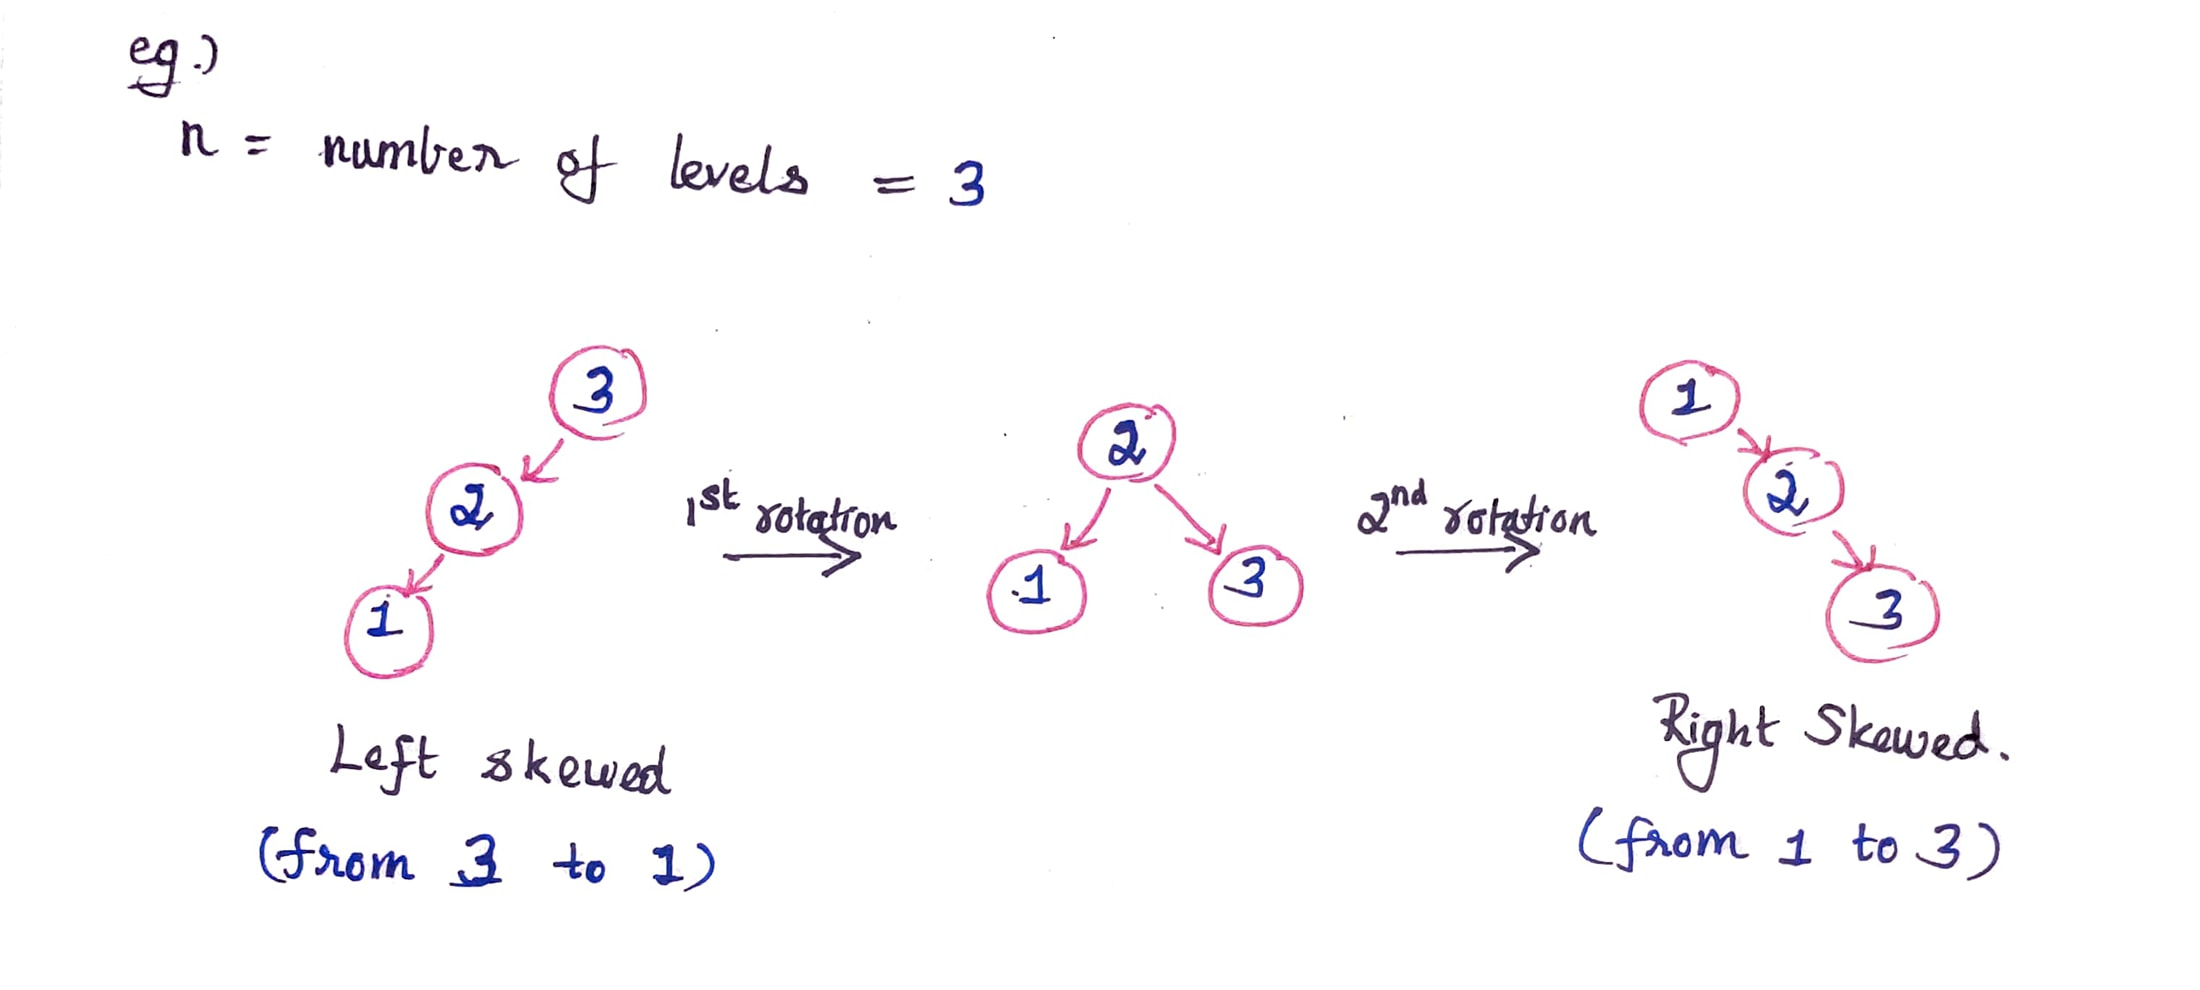

***Proof:***
> By definition, each right rotation will increase the length of the right most path by at least 1. <br>
$\therefore$ starting from the right most path with length $1$ (worst case), we need at most $(n-1)$ rotations to make LEFT into RIGHT

> Thus, any arbitrary shape of binary tree with $n$ nodes can be rotated into RIGHT within $(n-1)$ rotations.

Let $A$ be node we begin with. 

Let $B$ be node we end with. 

(In the worst case, we take $A$ to be the left most node and $B$ to be the rightmost node)


From the above claim know that $A$ can be rotated to RIGHT within $(n-1)$ rotations.

Similarly, $B$ can be rotated to RIGHT within $(n-1)$ rotations.
<br><br>

$\therefore$ To rotate $A$ into $B$, we can rotate $A$ into RIGHT, and do the inverse rotation to rotate from RIGHT into $B$.

$\Rightarrow$ The whole process can be done in $(n-1) + (n-1) = 2(n-1)$ roations in the worst case.

$\Rightarrow$ The time complexity of converting any $n$-node binary tree to any other $n$-node binary tree is $O(n)$ using rotations.

# ***The END!***